In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import random
np.random.seed(10)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter

In [16]:
def load_data(string,path='../Datasets for Mid Sem Presentation/'):
    X = np.load(path+string+"_x.npy")
    y = np.load(path+string+"_y.npy")
    
    return X,y
        
    
def relative_cost(truth,pred):
    return np.mean(abs(pred-truth)/(1+truth))


def abs_error(pred,truth):
    return np.mean(abs(pred-truth))

In [3]:
test_x,test_y = load_data('test_data')
train_x,train_y = load_data("train_data_2")
v_x,v_y = load_data("val_data_2")

In [4]:
from sklearn.cluster import KMeans

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(train_x)

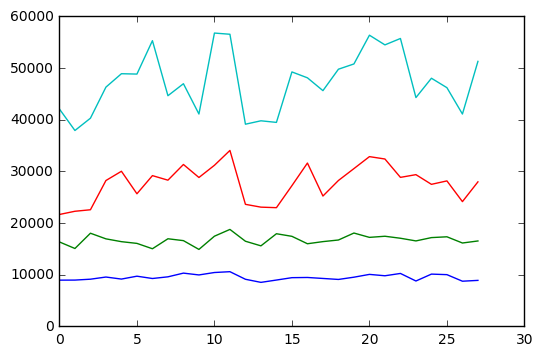

In [6]:
plt.close('all')
plt.figure()
kmeans.cluster_centers_.sort(axis=0)
for i in kmeans.cluster_centers_:
    plt.plot(np.arange(28),i)
plt.show()




In [7]:

def return_prediction(X,y,model_array,kmeans):

    preds = []
    models = model_array+[]
    centroids = kmeans.predict(X)
    for i in range(len(X)):
        centroid = centroids[i]
        model = models[centroid]
        val = model.predict([X[i]])
        preds.append(val)


    preds = np.array(preds).reshape(y.shape)
    return preds





In [8]:
val = min(Counter(kmeans.predict(train_x)).values())

In [9]:

errors=[]

for k in range(1,val):
    models=[]
    for i in range(kmeans.n_clusters):
    
        centroids = kmeans.predict(train_x)
        indices = np.where(centroids==i,True,False)
        data_x = train_x[indices]
        data_y = train_y[indices]
        model = KNeighborsRegressor(n_neighbors=k,weights='uniform')
        model.fit(data_x,data_y)
        models.append(model)
        model=None

        linear_error_model = LinearRegression()

        print (data_x.shape)


    centers_1 = kmeans.cluster_centers_
    trainx_clusters = kmeans.predict(train_x)
    testx_clusters = kmeans.predict(test_x)
    
    kmeans.cluster_centers_.sort(axis=0)
    preds_train = return_prediction(train_x,train_y,models,kmeans)
    preds_test = return_prediction(test_x,test_y,models,kmeans)
    preds_val = return_prediction(v_x,v_y,models,kmeans)
    
    train_cost = relative_cost(train_y,preds_train)
    v_cost = relative_cost(v_y,preds_val)
    test_cost = relative_cost(test_y,preds_test)


    
    errors.append(v_cost)



(38, 28)
(30, 28)
(13, 28)
(5, 28)
(38, 28)
(30, 28)
(13, 28)
(5, 28)
(38, 28)
(30, 28)
(13, 28)
(5, 28)
(38, 28)
(30, 28)
(13, 28)
(5, 28)


In [10]:
k_min = 1+errors.index(min(errors))

In [11]:
min(errors)

1.1050086

In [12]:
models=[]
for i in range(kmeans.n_clusters):
    
    centroids = kmeans.predict(train_x)
    indices = np.where(centroids==i,True,False)
    data_x = train_x[indices]
    data_y = train_y[indices]
    model = KNeighborsRegressor(n_neighbors=k_min,weights='uniform')
    model.fit(data_x,data_y)
    models.append(model)
    model=None

    linear_error_model = LinearRegression()

    print (data_x.shape)


centers_1 = kmeans.cluster_centers_
trainx_clusters = kmeans.predict(train_x)
testx_clusters = kmeans.predict(test_x)

kmeans.cluster_centers_.sort(axis=0)
preds_train = return_prediction(train_x,train_y,models,kmeans)
preds_test = return_prediction(test_x,test_y,models,kmeans)
preds_val = return_prediction(v_x,v_y,models,kmeans)

train_cost = relative_cost(train_y,preds_train)
v_cost = relative_cost(v_y,preds_val)
test_cost = relative_cost(test_y,preds_test)


(38, 28)
(30, 28)
(13, 28)
(5, 28)


In [13]:
kmeans.cluster_centers_.sort(axis=0)
preds_train = return_prediction(train_x,train_y,models,kmeans)
preds_test = return_prediction(test_x,test_y,models,kmeans)
preds_val = return_prediction(v_x,v_y,models,kmeans)

In [14]:
train_cost = relative_cost(train_y,preds_train)
v_cost = relative_cost(v_y,preds_val)
test_cost = relative_cost(test_y,preds_test)

In [15]:
train_cost,test_cost,v_cost

(0.7701946, 0.9280218, 1.1050086)

In [17]:
train_cost = abs_error(train_y,preds_train)
v_cost = abs_error(v_y,preds_val)
test_cost = abs_error(test_y,preds_test)

In [18]:
train_cost,test_cost,v_cost

(307.97867, 405.46405, 436.53925)

In [83]:
def transformer(X,y,temp_matrix,temp=True):
    lst1=[]
    lst2=[]
    for train_example_number in range(len(X)):
        cnt=0
        for day in range(30):
            for hour in range(24):
                days_data = X[train_example_number]
                if temp==True:
                    aug_data = np.concatenate((days_data,temp_matrix[day],np.array([day]),np.array([hour])),axis=0)
                else:
                    aug_data = np.concatenate((days_data,np.array([day]),np.array([hour])),axis=0)
                lst1.append(aug_data)
                lst2.append(y[train_example_number][cnt])
                cnt+=1
    return np.array(lst1),np.array(lst2)
            

In [84]:
temp_matrix = temp_data.as_matrix()[:,1:]

/home/rithwik/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [85]:
train_x,train_y = transformer(train_x,train_y,temp_matrix,False)
test_x,test_y = transformer(test_x,test_y,temp_matrix,False)


In [86]:
train_x[-1]

array([6.03513330e+03, 5.87789990e+03, 5.94844971e+03, 5.97103320e+03,
       8.40400000e+03, 9.15253320e+03, 1.05299004e+04, 1.50081836e+04,
       1.07028672e+04, 1.16431670e+04, 1.09150664e+04, 8.71511621e+03,
       1.20749336e+04, 1.63635000e+04, 3.14608672e+04, 5.54151484e+04,
       5.02939688e+04, 4.59502344e+04, 4.63445156e+04, 5.25526680e+04,
       5.10024844e+04, 4.55055508e+04, 4.89707148e+04, 2.67515176e+04,
       1.59570996e+04, 1.84945176e+04, 1.31117666e+04, 1.76502168e+04,
       9.12731641e+03, 1.08396836e+04, 2.90000000e+01, 2.30000000e+01])